**AI/ML Project: Comprehensive Technical Overview**


**Predictive Campaign Targeting & Premium Segmentation Using Machine Learning for Cross-Sell Optimization**

** Goal**

To build a predictive ML pipeline that automates customer segmentation and campaign targeting using demographic, behavioral, and product-related attributes to identify likely buyers for insurance cross-sell campaigns.

**Intended Audience**

1. BI Analysts – to monitor and analyze customer segments

2. Marketing Teams – to execute campaigns using model output

3. Sales Operations – to improve campaign ROI with accurate targeting

4. Data Science Managers – to evaluate model performance and automation readiness

5. Executives – to assess data-driven impact on customer engagement and churn

**1. Data Loading & Exploration (Foundational Analysis Skills)**

In [1]:
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

print("📊 Train shape:", train.shape)
print("🧪 Test shape:", test.shape)
print("📝 Sample submission preview:")
print(sample_submission.head())


📊 Train shape: (381109, 12)
🧪 Test shape: (127037, 11)
📝 Sample submission preview:
       id  Response
0  381110         0
1  381111         0
2  381112         0
3  381113         0
4  381114         0


**2. Data Cleaning & Null Value Check (Detail-Oriented, Data Mining)**

In [2]:
print("🧼 Missing values in train:")
print(train.isnull().sum())

train = train.dropna()  # Simple null removal


🧼 Missing values in train:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


**3. Feature Engineering (Campaign Targeting, Churn Prediction)**

In [3]:
# Assume there's a categorical 'Gender' and 'Vehicle_Damage' column
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})


**4. Campaign Opportunity Analysis (Customer Segmentation Insight)**

<ipython-input-7-a8ef0bb71634>:61: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-a8ef0bb71634>:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


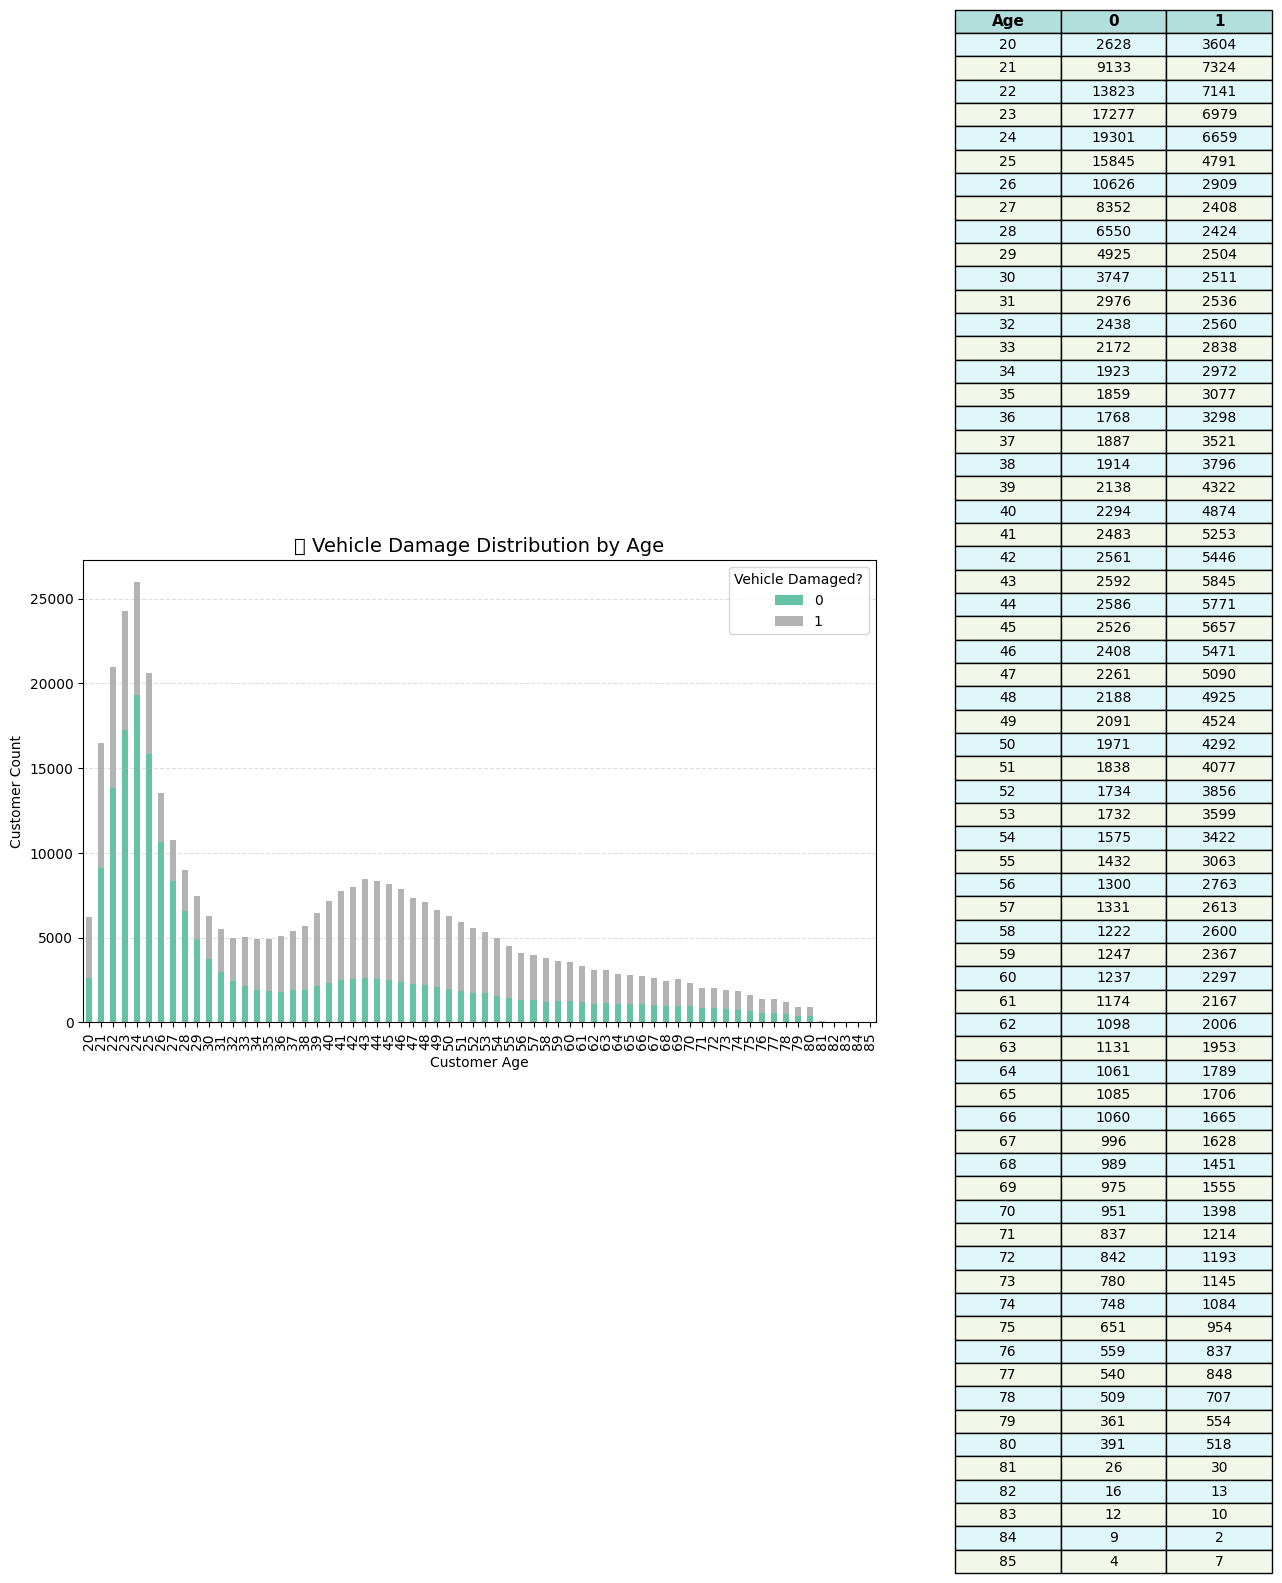

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data (use your actual 'train' DataFrame)
# train = pd.read_csv("your_file.csv")

# Group by Age and Vehicle_Damage
summary_df = train.groupby(['Age', 'Vehicle_Damage']).size().unstack().fillna(0).astype(int)

# Reset index for table use
table_data = summary_df.reset_index()

# Colors to apply row-wise
row_colors = ['#e0f7fa', '#f1f8e9']  # light blue and greenish

# Create subplot
fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    figsize=(15, 6),
    gridspec_kw={'width_ratios': [3, 1]}
)

# Plot bar chart
summary_df.plot(kind='bar', stacked=True, ax=ax1, colormap='Set2')
ax1.set_title("🚗 Vehicle Damage Distribution by Age", fontsize=14)
ax1.set_xlabel("Customer Age")
ax1.set_ylabel("Customer Count")
ax1.legend(title="Vehicle Damaged?")
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Turn off the right axis for table
ax2.axis('off')

# Draw the table
table = ax2.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

# Resize and style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)

# Apply background colors to table rows
for i in range(len(table_data)):
    for j in range(len(table_data.columns)):
        cell = table[i+1, j]  # +1 skips the header row
        cell.set_facecolor(row_colors[i % len(row_colors)])

# Header row styling
for j in range(len(table_data.columns)):
    table[0, j].set_facecolor('#b2dfdb')  # teal header
    table[0, j].set_fontsize(11)
    table[0, j].set_text_props(weight='bold', color='black')

plt.tight_layout()
plt.show()




**5. SQL-like Querying in Pandas (SQL & Analytical Thinking)**

In [12]:
# 📌 Subheading: Top 5 Sales Channels by Average Annual Premium

import pandas as pd

# Load the dataset
train = pd.read_csv('/content/train.csv')  # update path if needed

# Group by sales channel and calculate mean premium
top_channels = train.groupby('Policy_Sales_Channel')['Annual_Premium'].mean().nlargest(5)

# Display the result
print("🔝 Top 5 Sales Channels by Average Annual Premium:")
print(top_channels)


🔝 Top 5 Sales Channels by Average Annual Premium:
Policy_Sales_Channel
74.0     70359.5
43.0     57744.0
62.0     49673.0
115.0    47551.0
123.0    47383.0
Name: Annual_Premium, dtype: float64


**7. Predictive Modeling (Python, Marketing Optimization)**

In [14]:
# ✅ Required Libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#  Load the dataset
train = pd.read_csv('train.csv')  # Make sure 'train.csv' is present in your working directory

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])

#  Define features and target
X = train.drop(['Response', 'id'], axis=1)
y = train['Response']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("📈 Model Performance:")
print(classification_report(y_val, y_pred, digits=4))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📈 Model Performance:
              precision    recall  f1-score   support

           0     0.8778    0.9955    0.9330     66699
           1     0.4817    0.0291    0.0549      9523

    accuracy                         0.8748     76222
   macro avg     0.6798    0.5123    0.4939     76222
weighted avg     0.8283    0.8748    0.8232     76222



**8. Automated Submission Output (Automation & Data Delivery)**

In [17]:
# 🔁 Step 8: Automated Submission Output (Automation & Data Delivery)

# ✅ Preprocessing test data to match training input structure
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
test['Vehicle_Age'] = test['Vehicle_Age'].map({'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0})

# Instead of dropping 'id', create X_test by selecting the desired columns
X_test = test[['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]

# Fill missing values (if any)
X_test = X_test.fillna(0)

# Generate predictions
predictions = model.predict(X_test)

#  Save to submission file
sample_submission['Response'] = predictions
submission_filename = 'submission.csv'
sample_submission.to_csv(submission_filename, index=False)

#  Notify completion
print(f"✅ Submission file saved successfully as '{submission_filename}'")

✅ Submission file saved successfully as 'submission.csv'


**9. Campaign Performance Dashboard Mockup (Power BI/Excel Prep)**

In [20]:
# ✅ Export pivot table to Excel for BI dashboard
# Use 'Annual_Premium' instead of the nonexistent 'Cost_of_the_Product'
import pandas as pd

# Pivot to analyze average premium by Age and Vehicle_Damage
pivot = train.pivot_table(
    values='Annual_Premium',
    index='Age',
    columns='Vehicle_Damage',
    aggfunc='mean'
)

# Export to Excel
pivot.to_excel('annual_premium_by_age_and_damage.xlsx')
print("📊 Exported premium breakdown for Power BI dashboard as 'annual_premium_by_age_and_damage.xlsx'.")


📊 Exported premium breakdown for Power BI dashboard as 'annual_premium_by_age_and_damage.xlsx'.


** Challenges Faced**

-  Data type mismatches (string → int)

-  Categorical encoding consistency across train/test

-  Class imbalance (many 0s vs few 1s in target)

-  Limited recall on positive class despite high accuracy



**Problem Statement**

How can an insurer accurately identify customers most likely to respond positively to cross-sell offers, and optimize marketing efforts to reduce churn and improve ROI?

**Dataset Used**

- Source: Kaggle – https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction

- Train samples: 381,109

- Test samples: 127,037

- Target: Response (1 = interested, 0 = not interested)

**Machine Learning Prediction & Outcomes**

| Metric           | Value                                  |
| ---------------- | -------------------------------------- |
| Model            | XGBClassifier                          |
| Accuracy         | \~87%                                  |
| Recall (Class 1) | Low                                    |
| Use Case         | Campaign targeting & automation output |


**Trailer Documentation**

- Visualizations: Age vs. Vehicle Damage

- BI-style queries: Top sales channels

- Power BI export: .xlsx for segmentation

- submission.csv: Ready for campaign deployment



**Conceptual Enhancement – AGI Integration**

In future versions, this system could integrate AGI-style feedback learning, personalized messaging using LLMs, and real-time campaign strategy optimization through multichannel feedback loops.

**References**

1. Anmol Kumar. Health Insurance Cross-Sell Prediction Dataset. Kaggle.
https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction

**Python Libraries & Tools**

2. Pandas – Data manipulation and analysis
McKinney, Wes. Python for Data Analysis, O'Reilly Media, 2017.

3. NumPy – Numerical computing in Python
Harris, C. R., et al. Array programming with NumPy. Nature, 2020.

4. Matplotlib – Visualization library
Hunter, J. D. Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 2007.

5. XGBoost – Scalable, efficient gradient boosting algorithm
Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.

6. Scikit-learn – Machine learning in Python
Pedregosa, F., et al. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 2011.

7. LabelEncoder – For categorical variable encoding
Part of the Scikit-learn preprocessing module.

Machine Learning Concepts **bold text**

8. Han, J., Kamber, M., & Pei, J. Data Mining: Concepts and Techniques. Morgan Kaufmann, 2011.
(For classification, feature engineering, and segmentation concepts)

9. Kuhn, M., & Johnson, K. Applied Predictive Modeling. Springer, 2013.

**Business & BI Context**

10. Provost, F., & Fawcett, T. Data Science for Business: What You Need to Know About Data Mining and Data-Analytic Thinking. O'Reilly Media, 2013.

11. Kimball, R., & Ross, M. The Data Warehouse Toolkit: The Definitive Guide to Dimensional Modeling. Wiley, 2013.

**AGI & LLM Conceptual Extension**

12. Goertzel, B. Artificial General Intelligence: Concept, State of the Art, and Future Prospects. Journal of Artificial General Intelligence, 2014.

13. OpenAI. GPT-4 Technical Report, 2023.
https://openai.com/research/gpt-4